# Audio Waves

In [1]:
# define the audio input
speech="audiolimpio.wav"

## 1) Processing Audio

In [2]:
import wave
import numpy as np

In [3]:
with wave.open(speech,'r') as spf: 
    sound_info = spf.readframes(-1)
    sound_info = np.frombuffer(sound_info, int)
    
    nframes = spf.getnframes() # number of frames
    frate = spf.getframerate() # frames per second

In [4]:
print(sound_info)

[  844450700197892  1407409243488264   844450700263430 ...
 -1688892810395657 -1407417833553931 -1125929971875849]


In [5]:
len(sound_info)

193974

In [6]:
print(frate) 
print(nframes)
length = nframes/float(frate)
print(length) # length

44100
775896
17.59401360544218


In [7]:
onesec_info = round(len(sound_info)/length)

## 2) Drawing Audio Wave

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

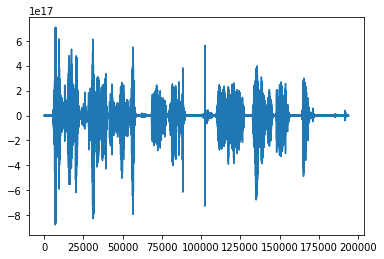

In [9]:
# Plot full soundwave
plt.plot(sound_info)

### 2.5) Drawing Audio Gif

In [10]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc

In [14]:
rc('animation', html='html5')

fig, ax = plt.subplots()
ylim = max(abs(sound_info)) * 1.1

mod = 10 # from 1 to length

def animate(i):
    ax.cla()
    ax.set_ylim(-ylim,ylim)
    ax.set_axis_off()
    
    current = (int(i * onesec_info/ mod),int((i + 1) * onesec_info / mod))
    ax.plot(sound_info[current[0]:current[1]],lw=0.1)
    

frames = int(length) * mod
ani = FuncAnimation(fig, animate, frames=frames, interval = 1000/mod, repeat=False)
plt.close()

In [15]:
ani

Note: when removing axis with set_axis_off(), the line width increases for some reason. I find it convenient to set it to lw = 0.1 in that case.

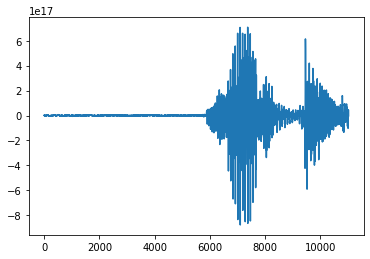

In [16]:
plt.plot(sound_info[0:onesec_info * 1]) # first second

## 3) Drawing spectrums

In [11]:
import spectrum

In [18]:
freq = spectrum.speriodogram(sound_info[:onesec_info]) # this is the frequency spectrum
print(freq)

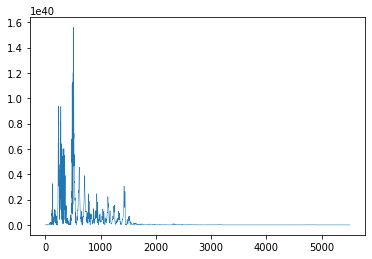

In [53]:
plt.plot(freq, lw=0.5)

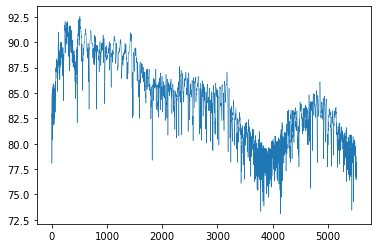

In [33]:
# this is the power spectrum, Log(freq)
#spectrum.Periodogram(sound_info[:onesec_info]).plot() 
plt.plot(np.log(freq), lw=0.5)
plt.grid(False)

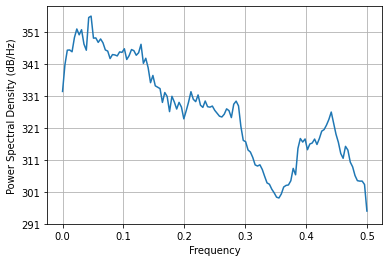

In [42]:
# no clue what this is, check https://pyspectrum.readthedocs.io/en/latest/ref_fourier.html#spectrum.periodogram.Periodogram
Welfreq = spectrum.WelchPeriodogram(sound_info[:onesec_info]) # this is the frequency spectrum
#print(Welfreq)
#plt.plot(Welfreq)

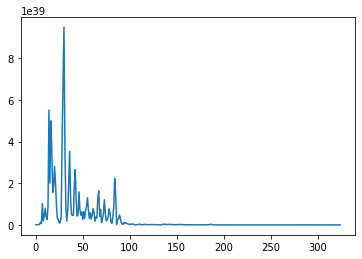

In [58]:
# This is a P-nearest-averaged spectrum. 
Danfreq = spectrum.DaniellPeriodogram(sound_info[:onesec_info],8) # this is the frequency spectrum
#print(Danfreq[0])
plt.plot(Danfreq[0])

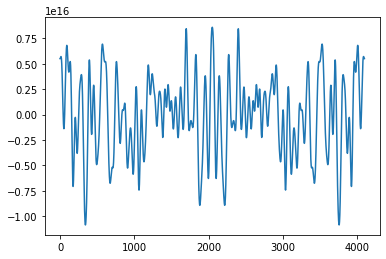

In [29]:
# no idea. A symmetric spiky wave, for all I know.
# higher lag = less spikes (lag=1 means Gauss bell). less length = less spikes, Less info?
CORRfreq = spectrum.CORRELOGRAMPSD(sound_info[:round(onesec_info/1)], lag=100)
#print(CORRfreq)
plt.plot(CORRfreq)

### 3.5) Drawing spectrum gif

In [300]:
rc('animation', html='html5')

fig, ax = plt.subplots()
#freq_tot = spectrum.speriodogram(sound_info)
#ylim = max(freq_tot) * 1.1 #this doesn't work well. 
ylim = 1e+40

log = True
mod = 10

def animate(i):
    ax.cla()
    #ax.set_xlim()
    ax.set_ylim(-1e+39,ylim)
    ax.set_axis_off()
    
    current = (int(i * onesec_info/ mod),int((i + 1) * onesec_info / mod))
    freq = spectrum.speriodogram(sound_info[current[0]:current[1]])
    if log:
        freq = np.log(freq)
        ax.set_ylim(65,100)
        
    ax.plot(freq, lw=0.1)
    

frames = int(length) * mod
ani = FuncAnimation(fig, animate, frames=frames, interval = 1000/mod, repeat=False)
plt.close()

In [301]:
ani

Same comment regarding the line width as before